In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Reading dataset

In [21]:
class_labels = pd.read_csv('./datasets/class_labels.csv',encoding='unicode_escape', sep=",", header=0, na_values=["?"])
kegg = pd.read_csv('./datasets/kegg_features.csv')
mashup = pd.read_csv('./datasets/mashup_features.csv')
pathDip = pd.read_csv('./datasets/pathdipall_features.csv')
gtex = pd.read_csv('./datasets/gtex_features.csv')

# Data Preprocessing

### Checking for Nan values

In [22]:
class_labels.isna().sum(axis=1).mean() # axis = 0 -> rows
class_labels.dropna(inplace=True)
class_labels.isna().sum(axis=1).mean()

0.0

In [23]:
kegg.isna().sum().mean()

0.0

In [24]:
mashup.isna().sum().mean()

0.0

In [25]:
pathDip.isna().sum().mean()

0.0

In [26]:
gtex.isna().sum().mean()

0.0

In [27]:
# X = gtex.columns
# X = np.array(X)

### Heat Map for GTex Dataset

<AxesSubplot: >

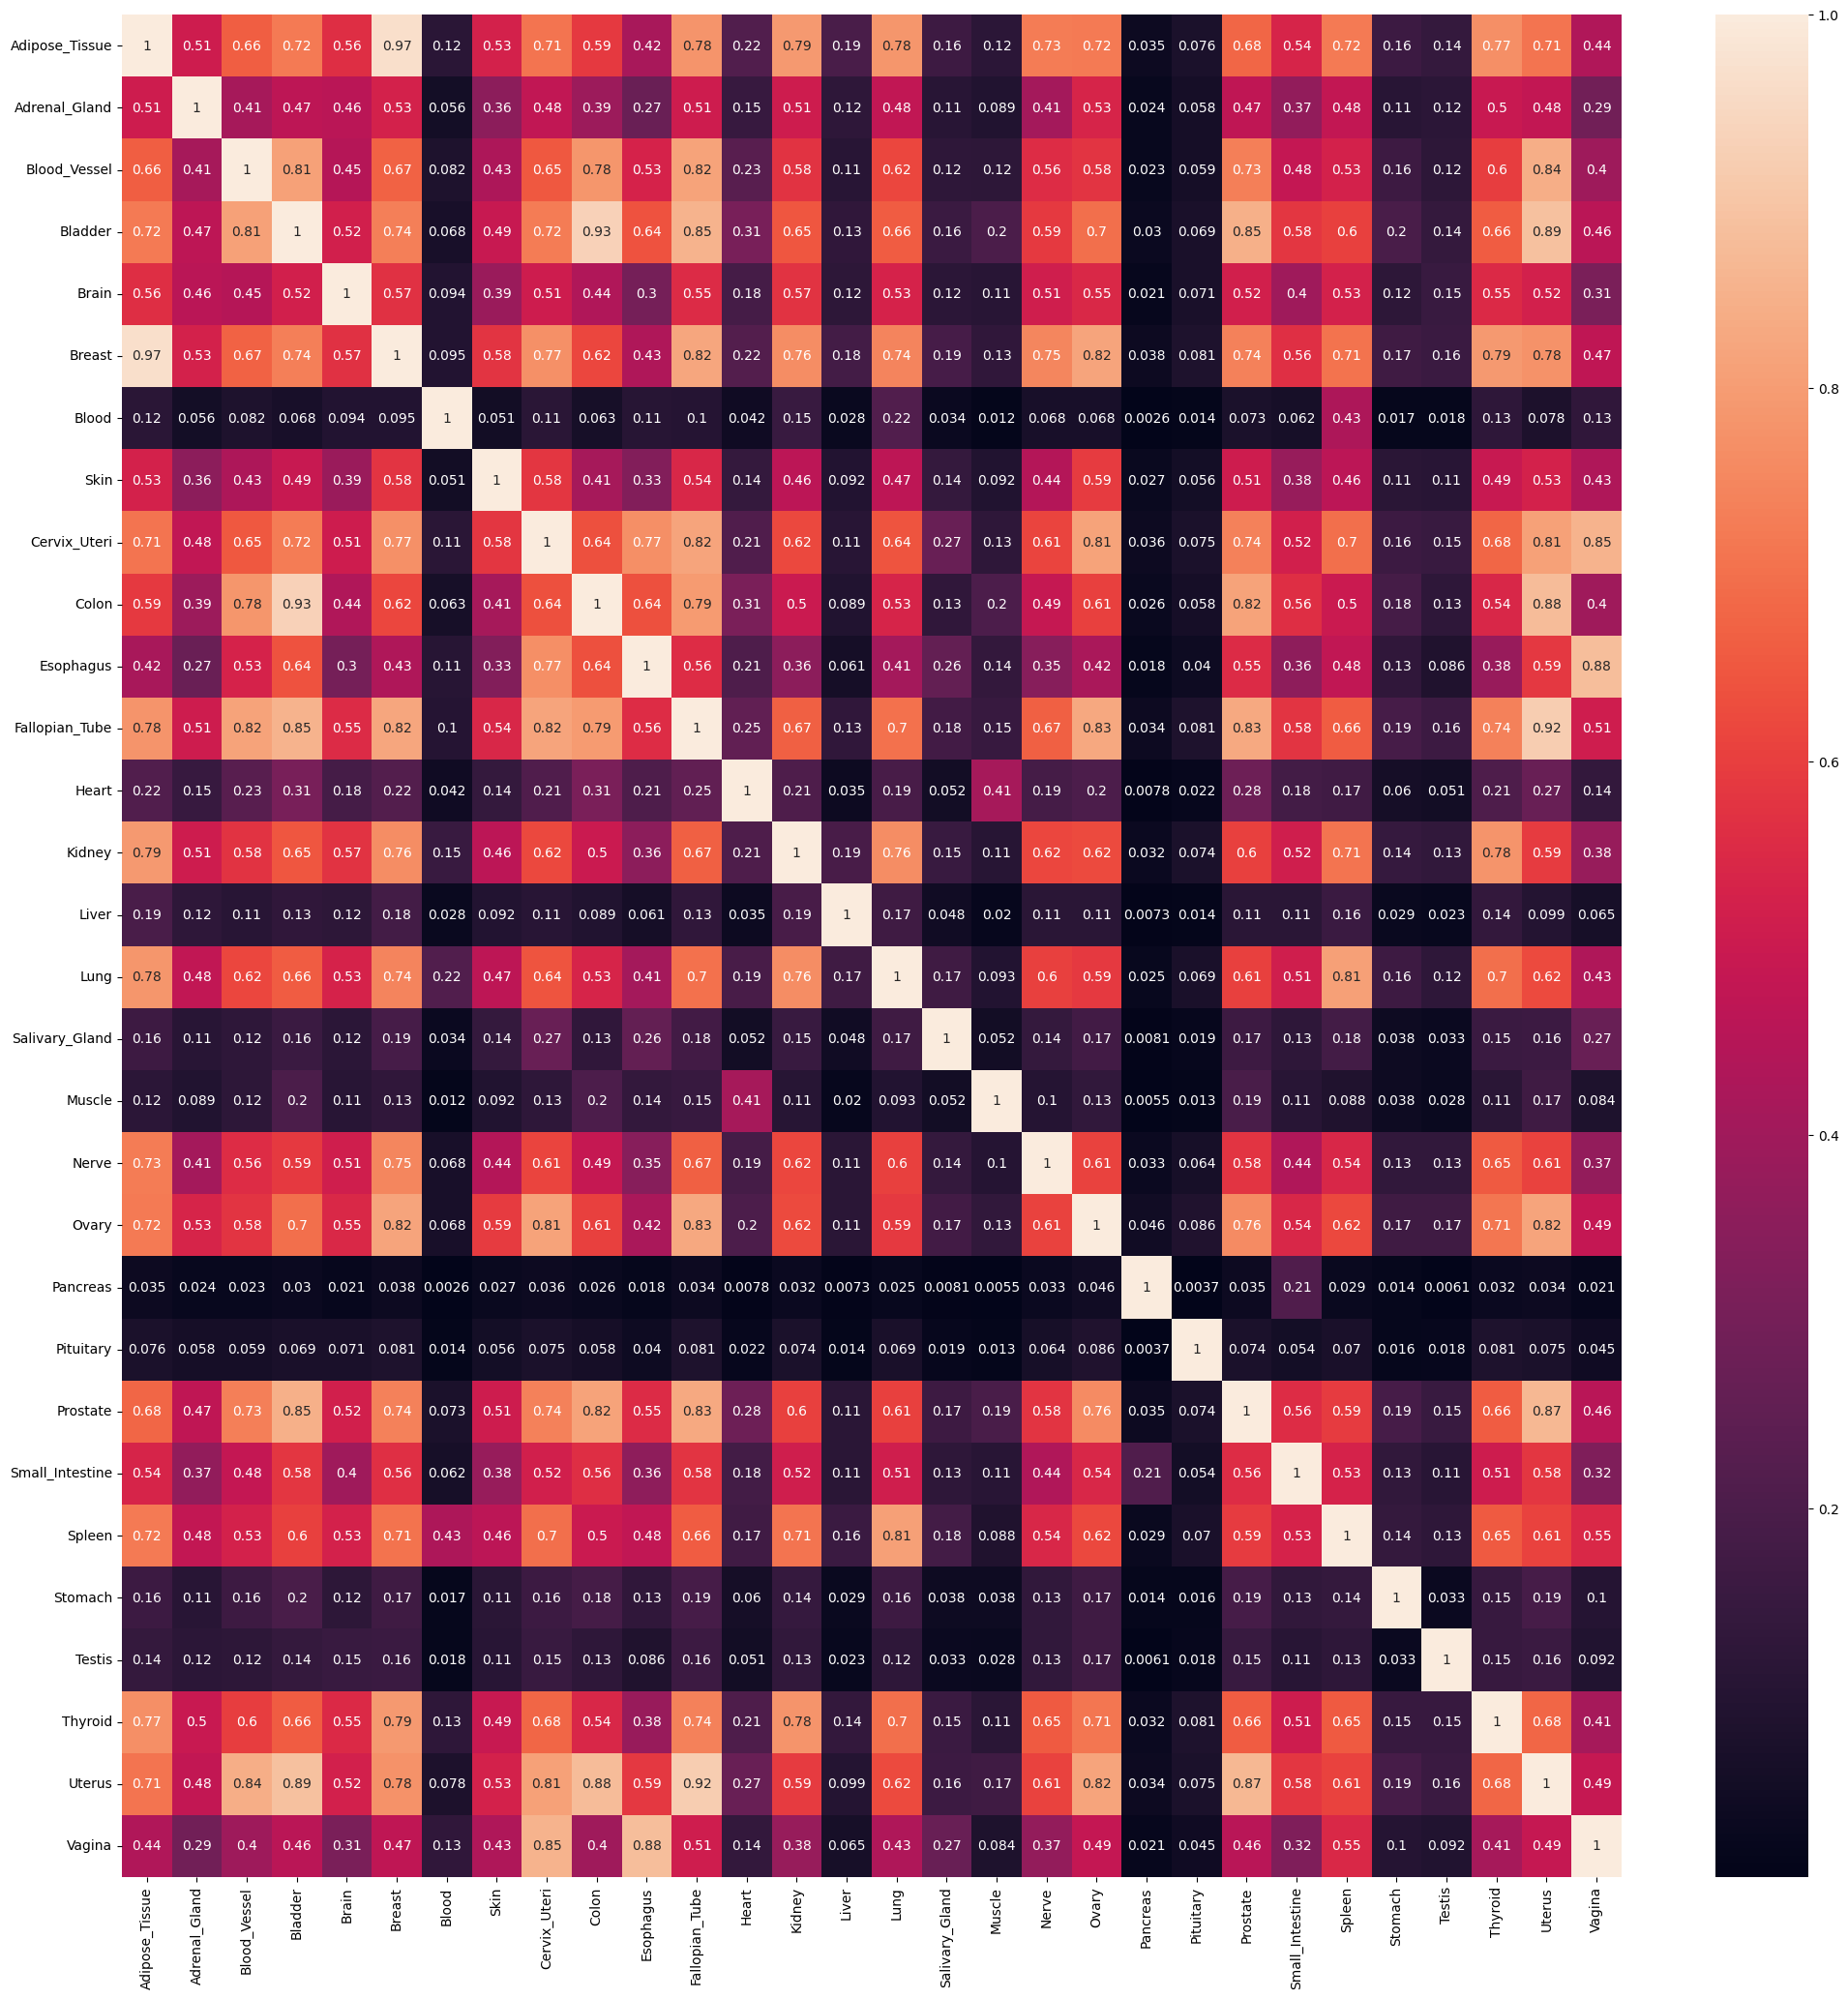

In [28]:
gtex_corrmat = gtex[["Adipose_Tissue","Adrenal_Gland","Blood_Vessel","Bladder","Brain","Breast","Blood","Skin","Cervix_Uteri","Colon","Esophagus","Fallopian_Tube","Heart","Kidney","Liver","Lung","Salivary_Gland","Muscle","Nerve","Ovary","Pancreas","Pituitary","Prostate","Small_Intestine","Spleen",'Stomach',"Testis","Thyroid","Uterus","Vagina"]].corr()
fig,ax = plt.subplots(figsize=(25,25))
sns.heatmap(gtex_corrmat,annot=True)

In [29]:
# The Breast and Adipose_tissue are having a high correlation so we can remove one of them.
# The Bladder and Colon are having a high correlation so we can remove one of them.
# The Fallopian_tube and Uterus are having a high correlation so we can remove one of them.

updated_gtex = gtex.drop(columns=['Breast','Breast_rel','Breast_rank','Bladder','Bladder_rel','Bladder_rank','Fallopian_Tube','Fallopian_Tube_rel','Fallopian_Tube_rank'])
updated_gtex.shape

(18597, 84)

### Normalising values to [0,1]

In [30]:
# normaliser = MinMaxScaler()
# mashup = normaliser.fit_transform(mashup)
# gtex = normaliser.fit_transform(gtex)

# Dataset Preparation

In [31]:
# Setting entrezId as index to all datasets

class_labels = class_labels.set_index("entrezId")
kegg = kegg.set_index("entrezId")
gtex = gtex.set_index("entrezId")
pathDip = pathDip.set_index("entrezId")
mashup = mashup.set_index("entrezId")

In [32]:
kegg = kegg.join(class_labels,how='inner')
print(kegg.shape)


(6995, 344)


In [33]:
gtex = gtex.join(class_labels,how='inner')
print(gtex.shape)


(18597, 119)


In [34]:
pathDip = pathDip.join(class_labels,how='inner')
print(pathDip.shape)


(15956, 4654)


In [35]:
mashup = mashup.join(class_labels,how='inner')
print(mashup.shape)


(15676, 828)


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualise(y_pred,y_test):

    for i in y_test:
        i = 1-i
    # Line plot
    plt.plot(y_test, label='True Values')
    plt.plot(y_pred, label='Predictions')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.title('Line Plot')
    plt.show()

    # Distribution plot
    sns.distplot(y_test, hist=False, label='True Values')
    sns.distplot(y_pred, hist=False, label='Predictions')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.title("Distribution Plot")
    plt.show()

33/33 [==============================] - 0s 2ms/step - loss: 1.5025 - mse: 0.0169
['loss', 'mse']
[1.5024776458740234, 0.016902612522244453]


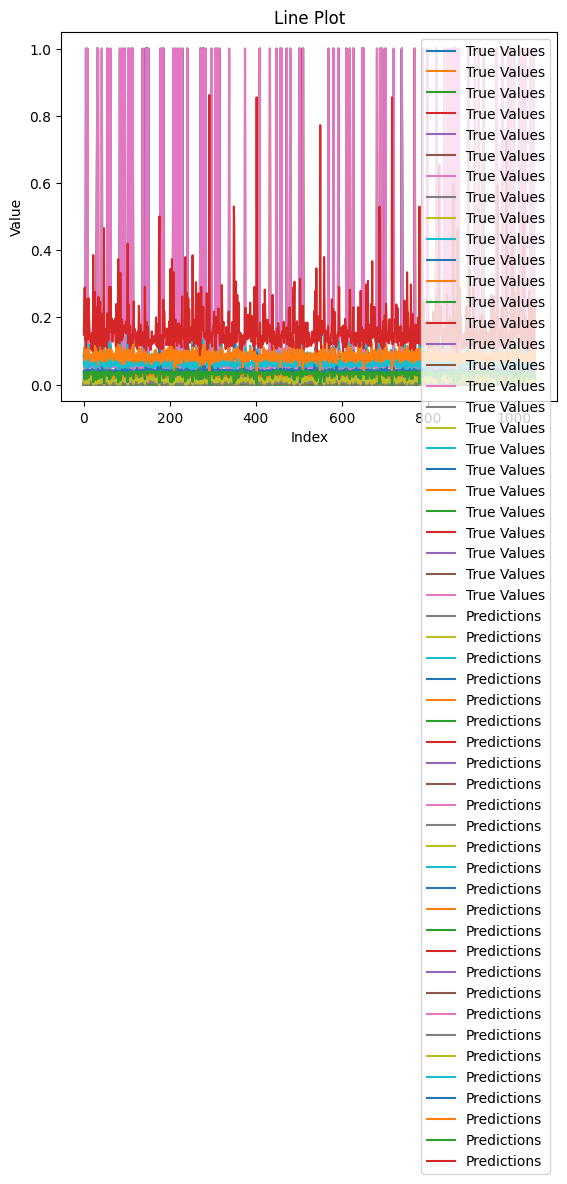

C:\Users\Saathvika\AppData\Local\Temp\ipykernel_20756\3907605733.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, label='True Values')
C:\Users\Saathvika\AppData\Local\Temp\ipykernel_20756\3907605733.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y

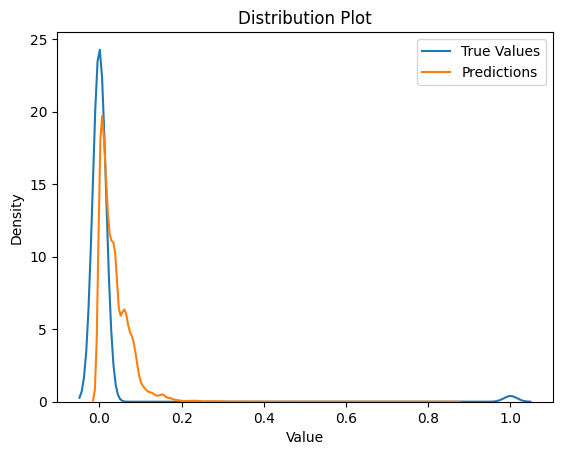

88/88 [==============================] - 0s 2ms/step - loss: 1.8018 - mse: 0.0110
['loss', 'mse']
[1.8018267154693604, 0.010995524004101753]


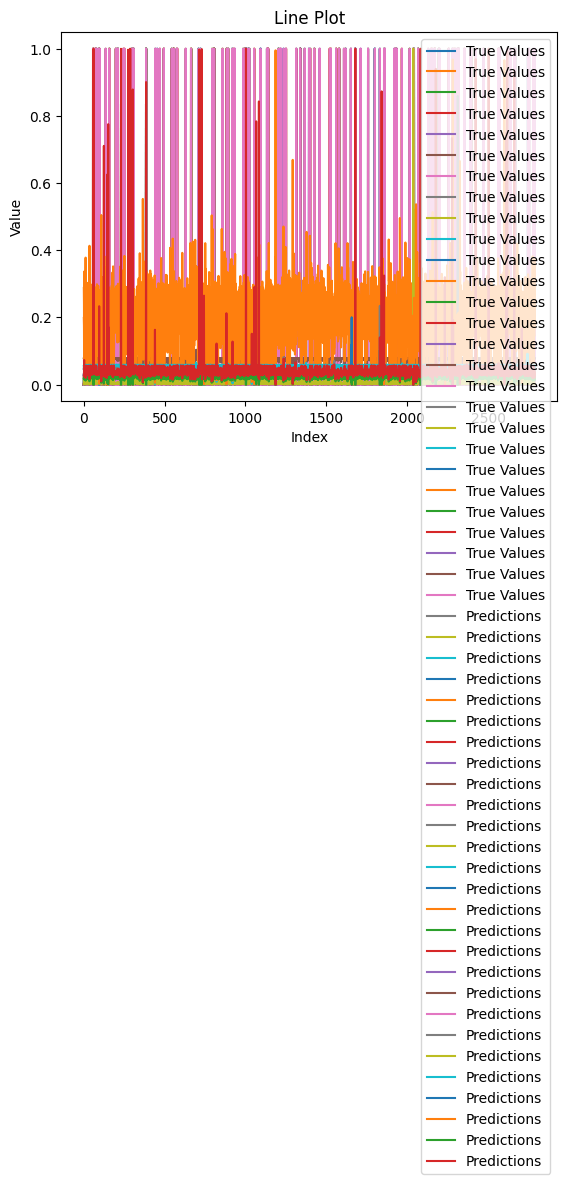

C:\Users\Saathvika\AppData\Local\Temp\ipykernel_20756\3907605733.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, label='True Values')
C:\Users\Saathvika\AppData\Local\Temp\ipykernel_20756\3907605733.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y

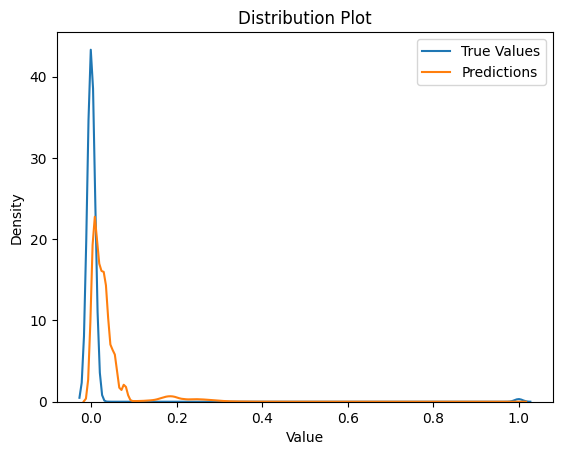

75/75 [==============================] - 0s 3ms/step - loss: 219.0255 - mse: 0.0467
['loss', 'mse']
[219.0255126953125, 0.04671751335263252]


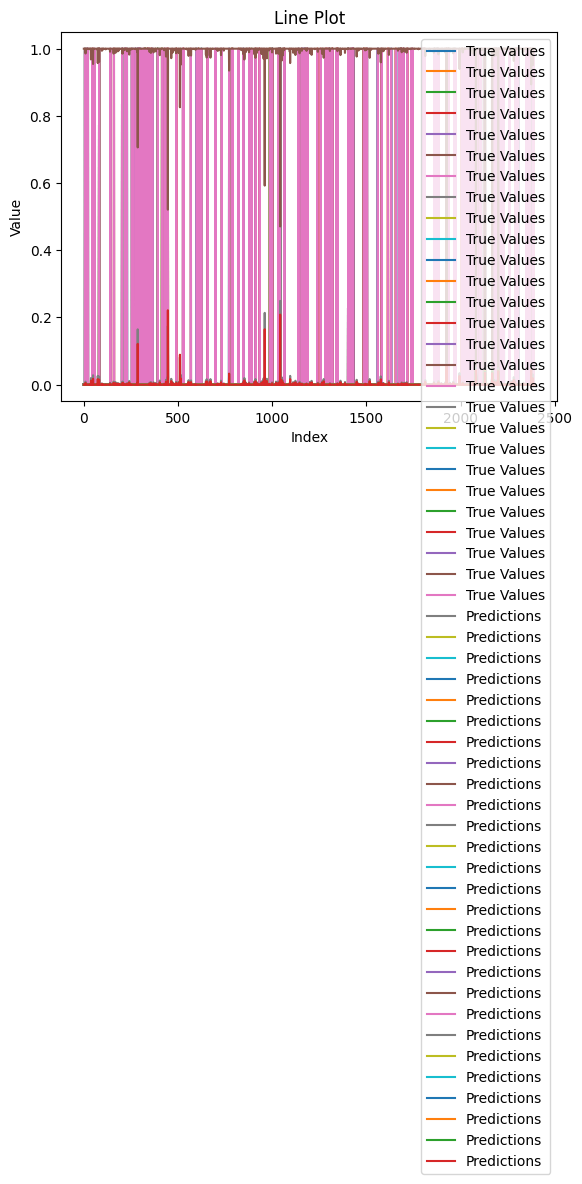

C:\Users\Saathvika\AppData\Local\Temp\ipykernel_20756\3907605733.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, label='True Values')
C:\Users\Saathvika\AppData\Local\Temp\ipykernel_20756\3907605733.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y

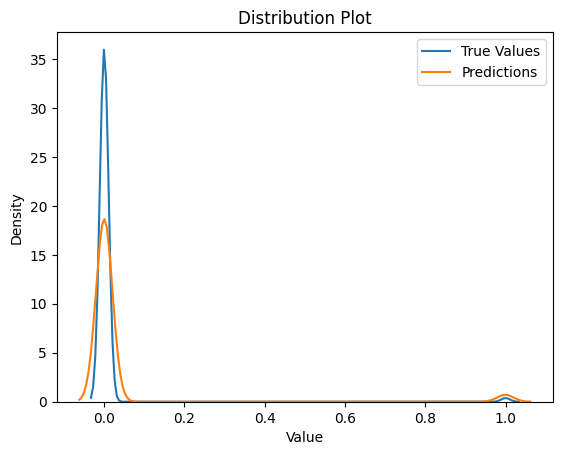

74/74 [==============================] - 0s 2ms/step - loss: 0.8270 - mse: 0.0101
['loss', 'mse']
[0.8270271420478821, 0.010129449889063835]


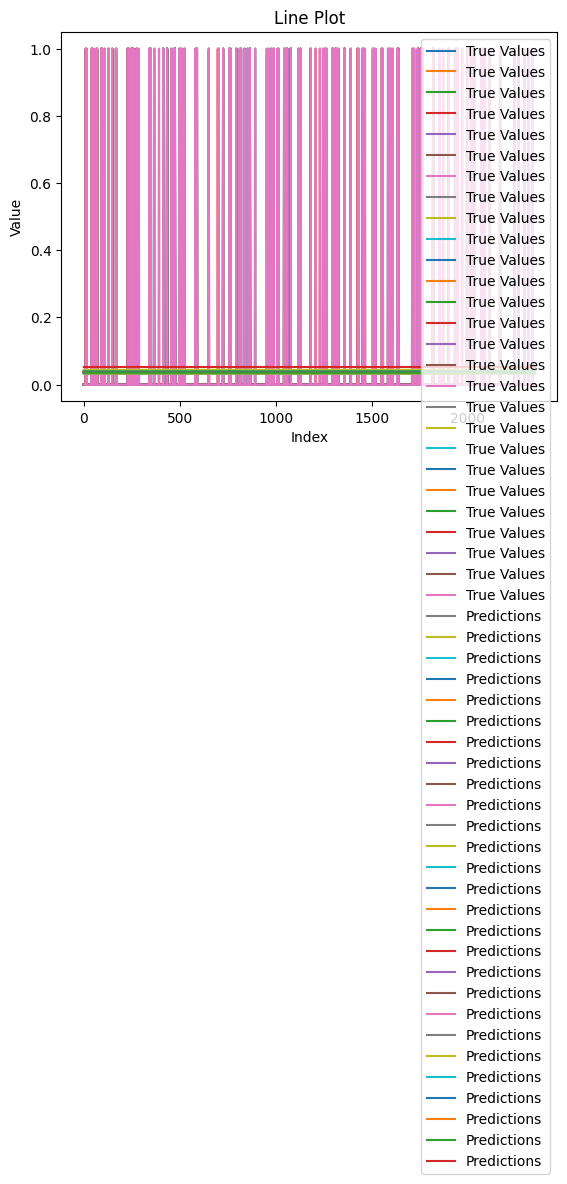

C:\Users\Saathvika\AppData\Local\Temp\ipykernel_20756\3907605733.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, label='True Values')
C:\Users\Saathvika\AppData\Local\Temp\ipykernel_20756\3907605733.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y

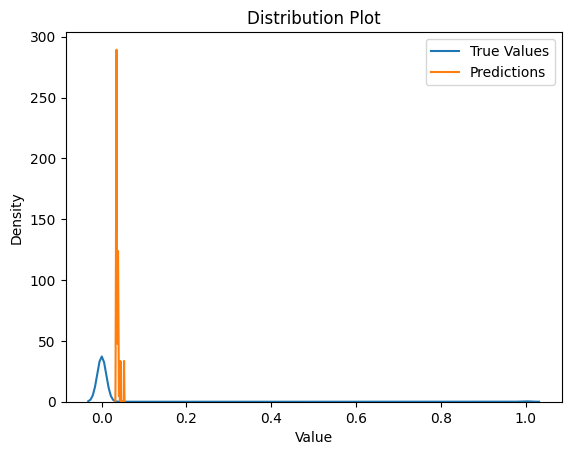

In [42]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

datasets = [kegg,gtex,pathDip,mashup]
concatinated = []
dataset_y_pred = np.empty((0, 27))
dataset_y_test = np.empty((0, 27))
dataset_y_pred= np.array(dataset_y_pred)
dataset_y_test= np.array(dataset_y_test)
for i in datasets:
    X = i.iloc[:,:-27]
    Y = i.iloc[:,-27:]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.15,shuffle = 42)
    X_train = np.asarray(X_train).astype(np.float64)
    Y_train = np.asarray(Y_train).astype(np.float64)
    X_test = np.asarray(X_test).astype(np.float64)
    Y_test = np.asarray(Y_test).astype(np.float64)

    # define the number of features in your dataset
    num_features = X_train.shape[1]

    # define the model
    model = Sequential()
    model.add(Dense(64, input_dim=num_features, activation='relu'))
    model.add(Dense(32, input_dim=num_features, activation='relu'))
    model.add(Dense(32, input_dim=num_features, activation='relu'))
    model.add(Dense(16, input_dim=num_features, activation='relu'))
    model.add(Dense(27, activation='softmax'))

    # compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mse'])
    model.fit(X_train,Y_train,epochs=1,batch_size=32,validation_data=(X_test,Y_test))
    Y_pred = model.predict(X_test)
    score = model.evaluate(X_test,Y_test)
    print(model.metrics_names)
    print(score)
    if dataset_y_pred.size == 0:
        dataset_y_pred = Y_pred
        dataset_y_test = Y_test
    else:
        dataset_y_pred = np.vstack((dataset_y_pred,np.array(Y_pred)))
        dataset_y_test = np.vstack((dataset_y_test,np.array(Y_test)))
    concatinated.append(model.output)
    visualise(Y_pred,Y_test)


(7298,)
41/41 [==============================] - 0s 1ms/step
['loss', 'mse']


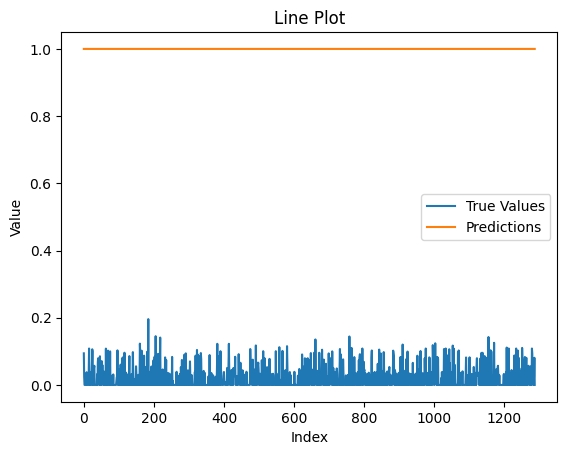

C:\Users\Saathvika\AppData\Local\Temp\ipykernel_20756\3907605733.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, label='True Values')
C:\Users\Saathvika\AppData\Local\Temp\ipykernel_20756\3907605733.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y

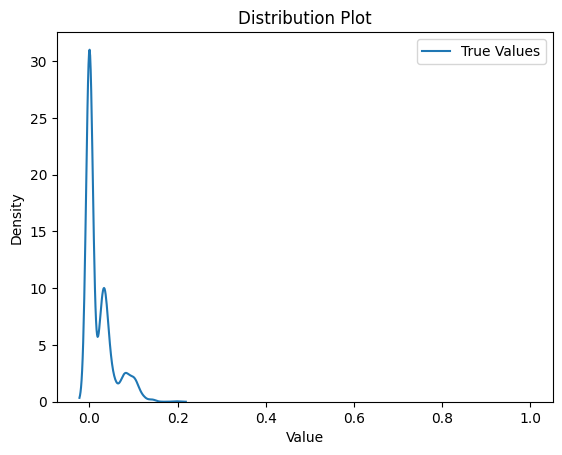

In [41]:
dataset_y_pred = pd.DataFrame(dataset_y_pred)
X = dataset_y_pred.iloc[:,:-1]
Y = dataset_y_pred.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.15,shuffle = 42)
X_train = np.asarray(X_train).astype(np.float64)
Y_train = np.asarray(Y_train).astype(np.float64)
X_test = np.asarray(X_test).astype(np.float64)
Y_test = np.asarray(Y_test).astype(np.float64)
num_features = X_train.shape[1]
model = Sequential()
# model.add(Dense(32, input_dim=num_features, activation='relu'))
# model.add(Dense(32, input_dim=num_features, activation='relu'))
model.add(Dense(32, input_dim=num_features, activation='relu'))
model.add(Dense(16, input_dim=num_features, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mse'])
print(Y_train.shape)
model.fit(X_train,Y_train,epochs=1,batch_size=32,validation_data=(X_test,Y_test))
Y_pred = model.predict(X_test)
# score = model.evaluate(Y_test,Y_pred)
print(model.metrics_names)
# print(score)
visualise(Y_pred,Y_test)